In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_april = pd.read_csv(r'C:\Users\sadeg\Desktop\code\project 2\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
df_april.shape

# this is the data just for one month, so we should merge all data to have one file

(18383, 6)

In [3]:
# merging 12 months of sales data into a single file

import os
import glob
csv_files = glob.glob('*.{}'.format('csv'))
data = pd.DataFrame()
for name in range(len(csv_files)):
    monthly_df = pd.read_csv(csv_files[name])
    data = pd.concat([data,monthly_df], ignore_index = True)
# df.shape
data.to_csv('All_months.csv',index = False)

In [4]:
df = pd.read_csv(r'All_months.csv') # to read this and not use all other data sets later
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# going to remove Nane values
df.dropna(inplace=True )

In [7]:
# removing the cells that do not have regular valuse
df = df [ ~(df['Order Date'].str[:2] == 'Or')]

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors = 'coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors = 'coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'coerce')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


Adding Month column for data cleninig purposes

In [9]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [10]:
df['Month'] = df['Order Date'].dt.month

month_name_map = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec',
}
df.Month = df.Month.map(month_name_map)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [11]:
df['price_per_order'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,price_per_order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


Which month has the best sell? How much earned that month ?

In [12]:

df.groupby('Month').sum().sort_values(by='price_per_order',ascending=False)


,Quantity Ordered,Price Each,price_per_order
Month,,,
Dec,28114,4588415.41,4613443.34
Oct,22703,3715554.83,3736726.88
April,20558,3367671.02,3390670.24
Nov,19798,3180600.68,3199603.20
May,18667,3135125.13,3152606.75
March,17005,2791207.83,2807100.38
July,16072,2632539.56,2647775.76
June,15253,2562025.61,2577802.26
Aug,13448,2230345.42,2244467.88


In [13]:
# if want to plot, first must be in the same order
months =[month for month, df in df.groupby('Month')]
price_per_month = df.groupby('Month').sum()['price_per_order']

Text(0, 0.5, 'Total sell')

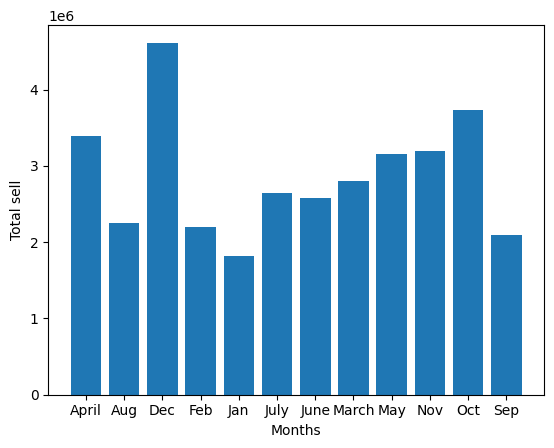

In [14]:
plt.bar(months,price_per_month)
plt.xlabel('Months')
plt.ylabel('Total sell')

what city had the highest number of sale?

In [15]:
# we should define city name based on the Purchase Address column
address_series = df["Purchase Address"].apply(lambda x: x.split(","))
city = address_series.apply(lambda x : x[1])
df['city'] = city.astype('str')


In [16]:
price_per_city = df.groupby('city').sum()['price_per_order']

([<matplotlib.axis.XTick at 0x1fee0661910>,
 [Text(0.0, 0, ' Atlanta'),
  Text(1.0, 0, ' Austin'),
  Text(2.0, 0, ' Boston'),
  Text(3.0, 0, ' Dallas'),
  Text(4.0, 0, ' Los Angeles'),
  Text(5.0, 0, ' New York City'),
  Text(6.0, 0, ' Portland'),
  Text(7.0, 0, ' San Francisco'),
  Text(8.0, 0, ' Seattle')])

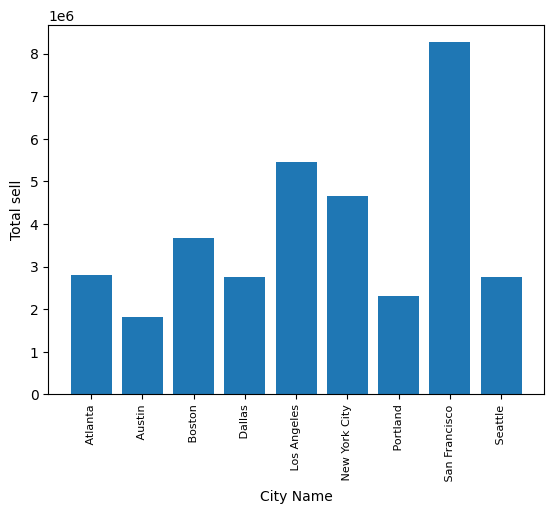

In [17]:
city_to_plot = [land for land,df_land in df.groupby('city')]
plt.bar(city_to_plot,price_per_city)
plt.xlabel('City Name')
plt.ylabel('Total sell')
plt.xticks(city_to_plot, rotation = 'vertical', size = 8)

What time should we display advertisment to maximize the likelihood of costumer's buying product?

In [18]:
# need to add "hour" column to data set that show the time the did purches someting

df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,price_per_order,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,9


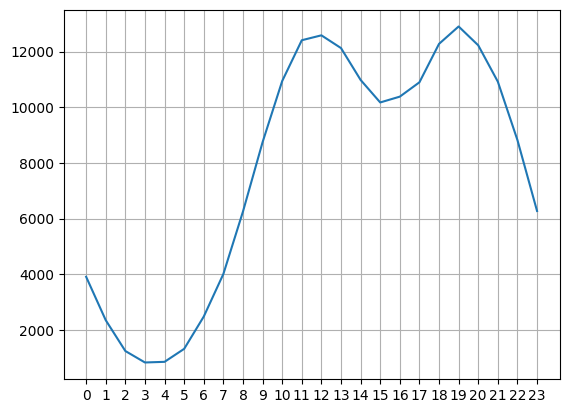

In [19]:
sell_per_hour = df.groupby('Hour').count()['price_per_order']
hour_to_plot = [hourr for hourr,df_hour in df.groupby('Hour')]
plt.xticks(hour_to_plot)
plt.grid()

plt.plot(hour_to_plot,sell_per_hour)

What product are often sold with together?

In [20]:
df2 = df [df['Order ID'].duplicated( keep = False)]   # the orders have more than two items
df2['Product'].nunique()   # we only have 19 items that are frequently solde in this df2


19

In [21]:
# HOWEVER, IF WE WANT TO USE LIBRARIES

df2['Grouped product'] = df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
new_df = df2[['Order ID','Grouped product']].drop_duplicates()
new_df = new_df.reset_index()
new_df.head()

,index,Order ID,Grouped product
0,3,176560,"Google Phone,Wired Headphones"
1,18,176574,"Google Phone,USB-C Charging Cable"
2,30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,32,176586,"AAA Batteries (4-pack),Google Phone"
4,119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [22]:
from itertools import combinations
from collections import Counter

count = Counter()
list = new_df['Grouped product'].apply (lambda x : x.split(','))


for sublist in list:
    count.update(Counter(combinations(sublist, 2)))

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [23]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [24]:
# if we want to see the 3-pair of items


list = new_df['Grouped product'].apply (lambda x : x.split(','))


for sublist in list:
    count.update(Counter(combinations(sublist, 3)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

What product sold the most? 

In [64]:
df.groupby('Product').count().sort_values(by='Quantity Ordered', ascending=False )

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,price_per_order,city,Hour
Product,,,,,,,,,
USB-C Charging Cable,21903,21903,21903,21903,21903,21903,21903,21903,21903
Lightning Charging Cable,21658,21658,21658,21658,21658,21658,21658,21658,21658
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577
Wired Headphones,18882,18882,18882,18882,18882,18882,18882,18882,18882
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507
iPhone,6842,6842,6842,6842,6842,6842,6842,6842,6842


In [67]:
product_name = [thing for thing, thing_df in df.groupby('Product')]
price_of_product = df.groupby('Product').mean()['Price Each']
Quantity_product = df.groupby('Product').count()['Quantity Ordered']

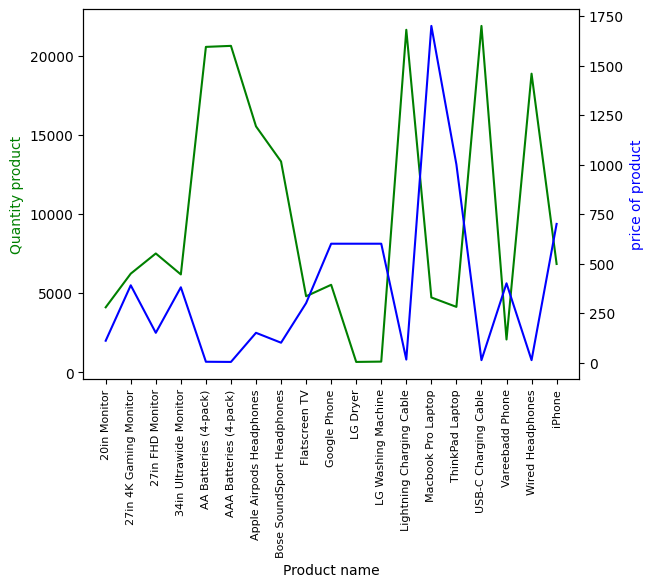

In [71]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(product_name, Quantity_product, 'g-')
ax2.plot(product_name, price_of_product, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity product', color='g')
ax2.set_ylabel('price of product', color='b')
ax1.set_xticklabels(product_name, rotation = 'vertical' , size = 8)
plt.show()